# Choose a skill to learn

To pick a new skill to learn, we should consider not only which are more requested. We should evaluate whether they are still requested or maybe there a new emerging ones. Last but not least, we could also think about a skill useful for the senior positions (and so higher paid).

*Methodology*

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

## Import Libraries and Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## Group the Skills by Month

Select only those job postings that are for Data Analysts and the job country is Italy. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [2]:
df_DA_it = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Italy')].drop_duplicates(subset=["job_title","company_name"]).copy()

# Create new column with month (in number) of posting date
df_DA_it['job_posted_month_no'] = df_DA_it['job_posted_date'].dt.month

# Explode skill column
df_DA_it_exploded = df_DA_it.explode('job_skills').copy()

## Pivot in Prep for Plotting

Create a pivot table from the `df_DA_it_explode`, setting 'month' as the index, `job_skills` as the columns, and fills missing entries with zero.

In [3]:
# job_posted_month_no will be used as index, with a job skill for each column
df_DA_it_pivot = df_DA_it_exploded.pivot_table(index='job_posted_month_no',columns='job_skills', aggfunc='size', fill_value=0)
df_DA_it_pivot

job_skills,airflow,alteryx,angular,ansible,asana,assembly,atlassian,aurora,aws,azure,...,vba,visio,visual basic,vmware,watson,windows,word,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4,2,3,2,0,0,0,1,11,21,...,11,0,0,1,0,0,11,0,0,2
2,0,2,0,1,1,0,0,0,7,13,...,12,0,2,0,0,1,8,0,0,0
3,0,3,0,1,0,0,0,0,11,9,...,6,0,4,0,0,1,3,0,0,0
4,0,1,0,2,0,0,0,0,8,6,...,6,0,0,0,0,6,8,0,0,0
5,0,1,0,1,0,0,0,0,4,1,...,5,0,1,0,0,2,6,0,2,0
6,0,2,0,0,0,1,0,0,5,9,...,13,1,0,0,1,8,19,0,0,0
7,1,1,0,0,3,0,2,0,5,6,...,5,1,1,1,0,4,10,2,1,0
8,0,3,0,0,1,0,2,0,4,12,...,10,0,1,3,0,7,9,0,0,0
9,0,3,0,0,0,0,0,0,6,8,...,8,0,3,0,0,6,13,0,0,0


## Sort columns by count and change month numbers to names
It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [4]:
# Add a row for the total demand of each skill
df_DA_it_pivot.loc['Total'] = df_DA_it_pivot.sum()
df_DA_it_pivot

# Sort columns with decreasing Total
df_DA_it_pivot = df_DA_it_pivot[df_DA_it_pivot.loc['Total'].sort_values(ascending=False).index]

# Now we don't need total row anymore
df_DA_it_pivot = df_DA_it_pivot.drop('Total')

df_DA_it_pivot

job_skills,excel,sql,python,power bi,sas,tableau,r,gdpr,sap,qlik,...,smartsheet,kotlin,terminal,julia,graphql,golang,flutter,redis,flask,svn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,87,101,62,40,28,27,34,21,21,12,...,0,0,0,0,0,0,0,0,0,0
2,84,85,51,31,46,31,26,16,22,10,...,0,0,0,1,0,0,0,0,0,0
3,85,72,63,23,22,35,30,30,9,10,...,0,1,0,0,0,0,1,0,0,0
4,74,69,52,29,20,29,28,21,8,10,...,0,0,0,0,0,0,0,0,0,0
5,48,61,46,25,30,23,25,15,8,16,...,0,0,0,0,0,1,0,0,0,1
6,127,94,58,45,48,28,27,30,19,16,...,0,0,0,0,0,0,0,0,0,0
7,119,83,44,40,30,49,28,17,24,15,...,0,0,0,0,1,0,0,0,0,0
8,107,75,63,41,42,38,38,20,23,11,...,0,0,0,0,0,0,0,0,0,0
9,103,66,56,46,30,35,29,18,19,8,...,1,0,0,0,0,0,0,0,1,0


## Calculate Percentage of Total Jobs
Calculates the total number of entries for each month in `df_DA`by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `DA_totals`. This is needed to compute the percentages.

In [5]:
# Compute total number of job posted per month
DA_totals = df_DA_it.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     255
2     216
3     191
4     182
5     140
6     270
7     302
8     343
9     248
10    269
11    269
12    225
dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the `df_DA_pivot` DataFrame, which contains skill counts, by the monthly totals in `DA_totals` and multiplying by 100. The new DataFrame, `df_DA_pivot_percent`, shows skill distributions as percentages of total monthly job entries.

In [6]:
# Compute percentage of postings number for each skill per month
df_DA_it_percent = df_DA_it_pivot.div(DA_totals/100,axis=0)
df_DA_it_percent = df_DA_it_percent.reset_index()

# Convert month number in month name (3 letters) to use as index
df_DA_it_percent['job_posted_month'] = df_DA_it_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_it_percent = df_DA_it_percent.set_index('job_posted_month')
df_DA_it_percent = df_DA_it_percent.drop(columns='job_posted_month_no')

df_DA_it_percent

job_skills,excel,sql,python,power bi,sas,tableau,r,gdpr,sap,qlik,...,smartsheet,kotlin,terminal,julia,graphql,golang,flutter,redis,flask,svn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,34.117647,39.607843,24.313725,15.686275,10.980392,10.588235,13.333333,8.235294,8.235294,4.705882,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Feb,38.888889,39.351852,23.611111,14.351852,21.296296,14.351852,12.037037,7.407407,10.185185,4.629630,...,0.000000,0.00000,0.000000,0.462963,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Mar,44.502618,37.696335,32.984293,12.041885,11.518325,18.324607,15.706806,15.706806,4.712042,5.235602,...,0.000000,0.52356,0.000000,0.000000,0.000000,0.000000,0.52356,0.000000,0.000000,0.000000
Apr,40.659341,37.912088,28.571429,15.934066,10.989011,15.934066,15.384615,11.538462,4.395604,5.494505,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
May,34.285714,43.571429,32.857143,17.857143,21.428571,16.428571,17.857143,10.714286,5.714286,11.428571,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.714286,0.00000,0.000000,0.000000,0.714286
Jun,47.037037,34.814815,21.481481,16.666667,17.777778,10.370370,10.000000,11.111111,7.037037,5.925926,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Jul,39.403974,27.483444,14.569536,13.245033,9.933775,16.225166,9.271523,5.629139,7.947020,4.966887,...,0.000000,0.00000,0.000000,0.000000,0.331126,0.000000,0.00000,0.000000,0.000000,0.000000
Aug,31.195335,21.865889,18.367347,11.953353,12.244898,11.078717,11.078717,5.830904,6.705539,3.206997,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Sep,41.532258,26.612903,22.580645,18.548387,12.096774,14.112903,11.693548,7.258065,7.661290,3.225806,...,0.403226,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.403226,0.000000


## Plot Monthly Skill Demand

Create a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the `df_DA_pivot_percent` DataFrame. Also the legend is moved outside of the plot for readability. Highlight skill that I don't know yet with colors.

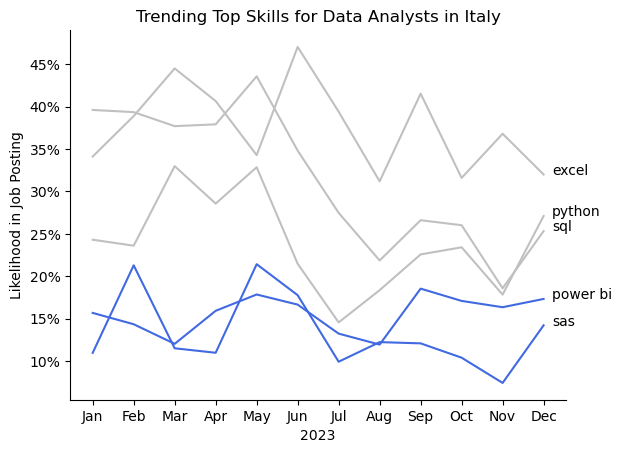

In [7]:
# Plot trends of top 10 skills 
top_skills = 5
df_plot = df_DA_it_percent.iloc[:,:top_skills]
my_skills=['excel','python','sql','r','tableau']
cols = ['silver']*top_skills
highlight_indices = np.where(~df_plot.columns.isin(my_skills))[0]
for idx in highlight_indices:
    cols[idx] = 'royalblue'  
sns.lineplot(data=df_plot, dashes=False, palette=cols)
plt.title('Trending Top Skills for Data Analysts in Italy')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
for i in range(top_skills):
    plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i])

ax = plt.gca()

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
sns.despine()
plt.show()